In [1]:
#name entity recognition --->> Basic Deep learning.
#topic modeling -->> NDA

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('quora_messed_dataset.csv')

C:\Users\bisun\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.shape

(404351, 13)

In [5]:
df = df[['id','qid1','qid2','question1','question2','is_duplicate']]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.5+ MB


In [7]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
272223,272223,535357,535358,What must be the academic career for good plac...,What are you guys doing after graduating Btech...,1
285872,285872,561820,561821,How can I lose 15 kilos in 5 months?,What's the best way to lose 15 kilos?,1
252276,252276,496652,496653,What can I do to improve my English speaking?,What is the best way to improve my spoken Engl...,1
229904,229904,453052,453053,"How dangerous is the Tenderloin, really?",Why is the Tenderloin district of San Francisc...,0
303801,303801,596559,596560,"Thomas Edison said: ""Tomorrow is my exam but I...",Why do we fear exams so badly while we know th...,0
274926,274926,540596,540597,What is buffer stock?,What is a buffer stock?,1
197307,197307,389411,389412,How can you open a .z01 file?,How do I open a .opf file?,0
38386,38386,76475,76476,Why did the Battle of Vimy Ridge occur? Why is...,Why was Vimy Ridge important to Canada?,1
38512,38512,76726,76727,How do I learn psychology by my own?,How can I learn psychology on my own?,1
305029,305029,598936,598937,What type of signal flows through an Ethernet ...,How does data transfer through ethernet cables?,0


In [8]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df['is_duplicate'].value_counts()

0                                                                                           254748
1                                                                                           149267
 he's straight. What should I do?                                                               10
 ?                                                                                               5
What are some TL                                                                                 5
                                                                                             ...  
 I would appreciate if the answer explains physical significance?                                1
Is it better to go for a job just after your graduation?                                         1
 review of the literature                                                                        1
What were Sir Francis Bacon's most important contributions to the scientific revolution?         1
 is it wor

In [11]:
254748+149267

404015

In [12]:
type(df['is_duplicate'][0])

str

In [13]:
#df1 = df[(df['is_duplicate'] == '0') | (df['is_duplicate'] == '1')] #string types.

#df1 = df[(df['is_duplicate'] == 0) | (df['is_duplicate'] == 1)] #int types

In [14]:
df.shape

(404351, 6)

In [15]:
df = df[df['is_duplicate'].isin(['0', '1'])]

In [16]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [17]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
47644,47644,94859,94860,What are some real-life applications of integr...,What are the applications of mathematical diff...,0
391371,391371,764971,764972,Which are the best mutual funds to invest with...,Which is the best mutual funds to invest in In...,0
109071,109071,216295,216296,Has anyone had problems getting a refund from ...,Food Allergies: Has anyone reading this person...,0
397722,397722,777123,777124,When Republicans say things that are clearly n...,How can one focus on his/her present instead o...,0
74574,74574,148192,148193,Where and how can I learn the best methods (ti...,Is there an equivalent of C++'s STL help file ...,0
38285,38285,76275,76276,How do I add question details digitally on Quora?,Is there a way to edit your question details b...,1
346606,346606,679190,300119,What are the best SEO technique?,What are the best SEO techniques?,1
88106,88106,174953,174954,How is that Amazon scores way ahead of flipkar...,Does the Amazon India Re.1 app deal work?,0
337941,337941,662505,662506,How is a German Sherperd/Great Pyrenees mix co...,How is a German Sherperd/Great Pyrenees mix co...,0
26654,26654,53151,53152,Could you provide me with the summary of the S...,What will government do with 1000 rs & 500 rs ...,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404015 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404015 non-null  int64 
 1   qid1          404015 non-null  int64 
 2   qid2          404015 non-null  int64 
 3   question1     404014 non-null  object
 4   question2     404013 non-null  object
 5   is_duplicate  404015 non-null  object
dtypes: int64(3), object(3)
memory usage: 21.6+ MB


0    254748
1    149267
Name: is_duplicate, dtype: int64
0    63.054095
1    36.945905
Name: is_duplicate, dtype: float64


<AxesSubplot:>

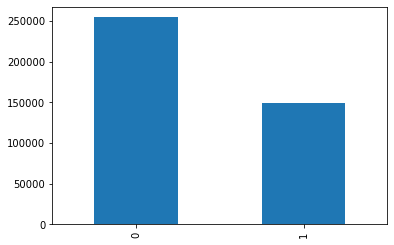

In [19]:
print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [20]:
df.to_csv('quora_dataset.csv',index=False)

In [21]:
#repeated_questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789154
Number of questions getting repeated 13675


In [22]:
np.unique(qid).shape[0]

789154

In [23]:
type(qid)

pandas.core.series.Series

In [24]:
x

65333      True
7863       True
147324     True
2628       True
26304      True
          ...  
530721    False
530723    False
530725    False
530727    False
789801    False
Length: 789154, dtype: bool

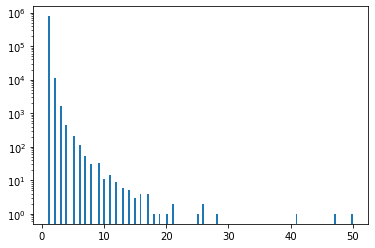

In [25]:
import matplotlib.pyplot as plt
plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()